# DATA1030 Project: Pokemon Battle Analysis

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

pkmn = pd.read_csv(r"C:\Users\User\Desktop\DSI\DATA1030-Fall2022\Taemin Huh DATA1030 Project\data\pokemon.csv")
pkmn = pkmn.rename(index=str, columns={"#": "ID"})
battle = pd.read_csv(r"C:\Users\User\Desktop\DSI\DATA1030-Fall2022\Taemin Huh DATA1030 Project\data\combats.csv")
pkmn.head()

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [2]:
battle.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [3]:
print("Shape of Pokemon data: ", (pkmn.shape))
print("Shape of Battle data: ", (battle.shape))

Shape of Pokemon data:  (800, 12)
Shape of Battle data:  (50000, 3)


In [4]:
# Identifying missing values
pkmn.isnull().sum()

ID              0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [5]:
battle.isnull().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

In [6]:
# Pokemon w/ missing name
pkmn[pkmn['Name'].isnull()]

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


In [7]:
# Via online Pokemon database (https://www.serebii.net/pokemon/type/fighting/), able to match the missing Pokemon name to "Primeape", which has exactly the above stat profile among the pool of 7 pure Fighting-type (i.e. no Type 2) Pokemons in Generation 1.
pkmn['Name'][62] = "Primeape"

C:\Users\User\AppData\Local\Temp\ipykernel_8132\3410218940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pkmn['Name'][62] = "Primeape"


In [8]:
# Feature engineering & merging datasets
winTotal = battle.Winner.value_counts()
winTotal = winTotal.sort_index()
firstAtk_Count = battle.First_pokemon.value_counts()
secondAtk_Count = battle.Second_pokemon.value_counts()
battleTotal = firstAtk_Count + secondAtk_Count

In [9]:
featEng = pd.DataFrame()
featEng['Total Win Count'] = winTotal
featEng['Total Battle Count'] = battleTotal
# featEng['First Attack Count'] = firstAtk_Count
# featEng['First Attack Rate'] = firstAtk_Count/battleTotal
featEng['Win Rate']= winTotal/battleTotal
pkmnWR = pd.merge(pkmn, featEng, right_index = True, left_on='ID')
pkmnWR

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Win Count,Total Battle Count,Win Rate
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37,133,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46,121,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89,132,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,70,125,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55,112,0.491071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,39,105,0.371429
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,116,131,0.885496
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,60,119,0.504202
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,89,144,0.618056


In [10]:
pkmnAll = pd.merge(pkmn, featEng, left_on='ID', right_index = True, how='left')
pkmnAll[pkmnAll['Win Rate'].isnull()]

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Win Count,Total Battle Count,Win Rate
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,NaN,NaN,NaN
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,NaN,NaN,NaN
45,46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False,NaN,NaN,NaN
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,NaN,NaN,NaN
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,NaN,NaN,NaN
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False,NaN,NaN,NaN
143,144,Ditto,Normal,NaN,48,48,48,48,48,48,1,False,NaN,NaN,NaN
182,183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False,NaN,NaN,NaN
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,NaN,NaN,NaN
235,236,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,NaN,NaN,NaN


In [11]:
pkmnWR.describe()

,ID,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total Win Count,Total Battle Count,Win Rate
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,402.873563,69.140485,79.007663,73.699872,72.839080,71.749681,68.443167,3.339719,63.856960,127.541507,0.501538
std,230.297452,25.348783,32.502566,30.879737,32.672868,27.248993,29.158076,1.656435,32.925941,11.397402,0.254993
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,3.000000,92.000000,0.021739
25%,204.500000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,2.000000,36.000000,120.000000,0.284228
50%,403.000000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.000000,62.000000,128.000000,0.491071
75%,601.500000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.000000,91.000000,135.000000,0.717644
max,800.000000,255.000000,190.000000,230.000000,194.000000,200.000000,180.000000,6.000000,152.000000,164.000000,0.984496


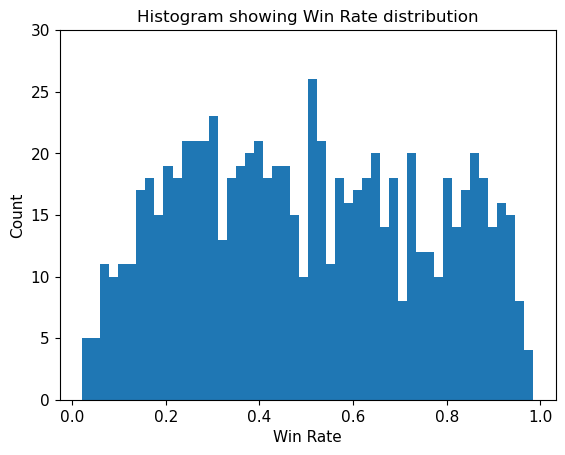

In [12]:
pkmnWR['Win Rate'].plot.hist(bins = 50,fontsize=11)
ax = plt.gca()
ax.set_ylim([0, 30])
plt.xlabel('Win Rate',fontsize=11)
plt.ylabel('Count',fontsize=11)
# arial = {'fontname':'Arial'}
# txt="Figure 1: Histogram showing Win Rate distribution."
# plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.title('Histogram showing Win Rate distribution',fontsize=12)
plt.savefig(r"C:\Users\User\Desktop\DSI\DATA1030-Fall2022\Taemin Huh DATA1030 Project\figures\WR Histogram.png")
plt.show()

In [13]:
# Pearson correlation table & heatmap 
col = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary', 'Win Rate']
pkmnWR.loc[:,col].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Win Rate
HP,1.000000,0.417427,0.265230,0.363244,0.409110,0.179423,0.280265,0.258006
Attack,0.417427,1.000000,0.464539,0.395211,0.288078,0.382310,0.348391,0.500181
Defense,0.265230,0.464539,1.000000,0.237592,0.490118,0.025762,0.247921,0.129426
Sp. Atk,0.363244,0.395211,0.237592,1.000000,0.529276,0.470548,0.448339,0.478940
Sp. Def,0.409110,0.288078,0.490118,0.529276,1.000000,0.276715,0.367030,0.324218
Speed,0.179423,0.382310,0.025762,0.470548,0.276715,1.000000,0.323420,0.937742
Legendary,0.280265,0.348391,0.247921,0.448339,0.367030,0.323420,1.000000,0.325007
Win Rate,0.258006,0.500181,0.129426,0.478940,0.324218,0.937742,0.325007,1.000000


                 HP    Attack   Defense   Sp. Atk   Sp. Def     Speed  \
HP         1.000000  0.417427  0.265230  0.363244  0.409110  0.179423   
Attack     0.417427  1.000000  0.464539  0.395211  0.288078  0.382310   
Defense    0.265230  0.464539  1.000000  0.237592  0.490118  0.025762   
Sp. Atk    0.363244  0.395211  0.237592  1.000000  0.529276  0.470548   
Sp. Def    0.409110  0.288078  0.490118  0.529276  1.000000  0.276715   
Speed      0.179423  0.382310  0.025762  0.470548  0.276715  1.000000   
Legendary  0.280265  0.348391  0.247921  0.448339  0.367030  0.323420   
Win Rate   0.258006  0.500181  0.129426  0.478940  0.324218  0.937742   

           Legendary  Win Rate  
HP          0.280265  0.258006  
Attack      0.348391  0.500181  
Defense     0.247921  0.129426  
Sp. Atk     0.448339  0.478940  
Sp. Def     0.367030  0.324218  
Speed       0.323420  0.937742  
Legendary   1.000000  0.325007  
Win Rate    0.325007  1.000000  


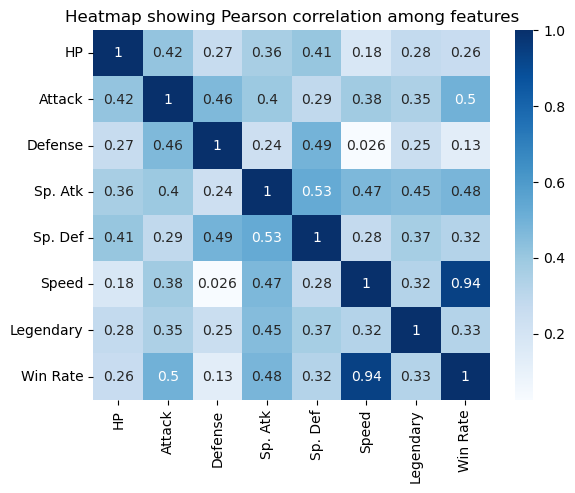

In [14]:
# Pearson correlation table & heatmap
import seaborn as sns

corr = pkmnWR.loc[:,col].corr(method='pearson', min_periods=1)
print(pkmnWR.loc[:,col].corr(method='pearson', min_periods=1))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.title('Heatmap showing Pearson correlation among features',fontsize=12)
plt.savefig(r"C:\Users\User\Desktop\DSI\DATA1030-Fall2022\Taemin Huh DATA1030 Project\figures\Pearson Correlation Heatmap.png")

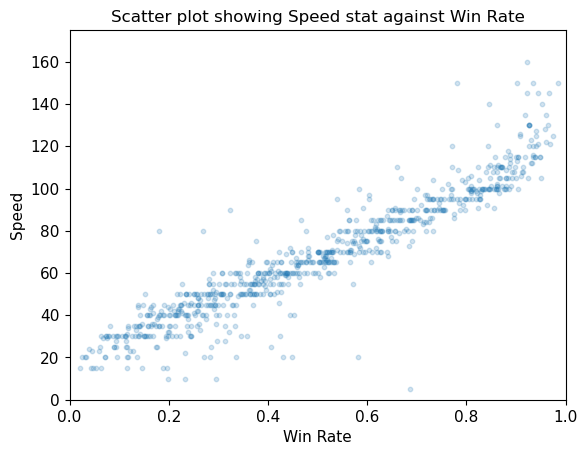

In [15]:
pkmnWR.plot.scatter('Win Rate', 'Speed',s=10,alpha=0.2,fontsize=11)
ax = plt.gca()
ax.set_xlim([0, 1])
ax.set_ylim([0, 175])
plt.xlabel('Win Rate',fontsize=11)
plt.ylabel('Speed',fontsize=11)
# txt="Scatter plot showing Speed stat against Win Rate."
# plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.title('Scatter plot showing Speed stat against Win Rate',fontsize=12)
plt.savefig(r"C:\Users\User\Desktop\DSI\DATA1030-Fall2022\Taemin Huh DATA1030 Project\figures\Speed-WR Scatter Plot.png")
plt.show()

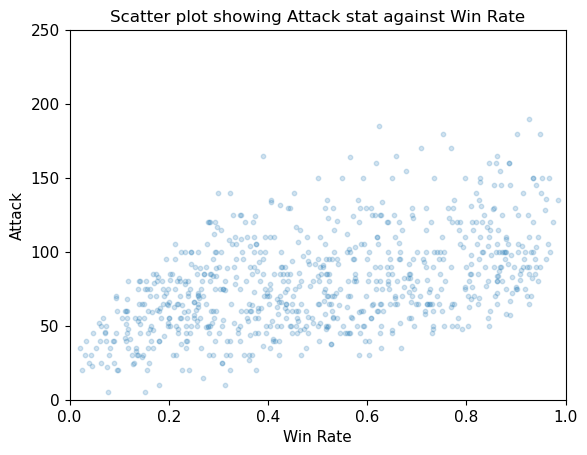

In [16]:
pkmnWR.plot.scatter('Win Rate', 'Attack',s=10,alpha=0.2,fontsize=11)
ax = plt.gca()
ax.set_xlim([0, 1])
ax.set_ylim([0, 250])
plt.xlabel('Win Rate',fontsize=11)
plt.ylabel('Attack',fontsize=11)
# txt="Scatter plot showing Attack stat against Win Rate."
# plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.title('Scatter plot showing Attack stat against Win Rate', fontsize=12)
plt.savefig(r"C:\Users\User\Desktop\DSI\DATA1030-Fall2022\Taemin Huh DATA1030 Project\figures\Attack-WR Scatter Plot.png")
plt.show()

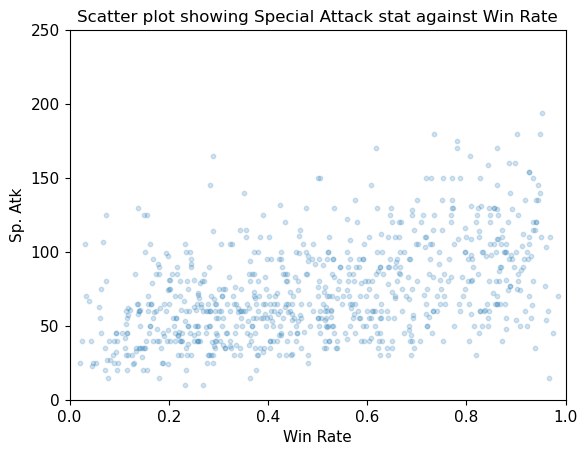

In [17]:
pkmnWR.plot.scatter('Win Rate', 'Sp. Atk',s=10,alpha=0.2,fontsize=11)
ax = plt.gca()
ax.set_xlim([0, 1])
ax.set_ylim([0, 250])
plt.xlabel('Win Rate',fontsize=11)
plt.ylabel('Sp. Atk',fontsize=11)
# txt="Scatter plot showing Special Attack stat against Win Rate."
# plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.title('Scatter plot showing Special Attack stat against Win Rate',fontsize=12)
plt.savefig(r"C:\Users\User\Desktop\DSI\DATA1030-Fall2022\Taemin Huh DATA1030 Project\figures\SpAtk-WR Scatter Plot.png")
plt.show()

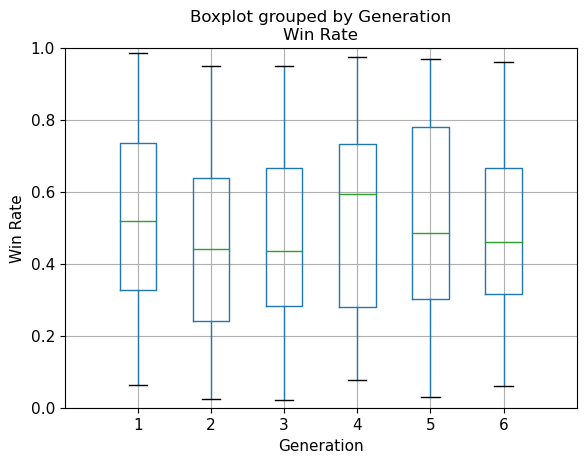

In [18]:
pkmnWR[['Win Rate','Generation']].boxplot(by='Generation',fontsize=11)
ax = plt.gca()
ax.set_xlim([0, 7])
ax.set_ylim([0, 1])
plt.ylabel('Win Rate',fontsize=11)
plt.xlabel('Generation',fontsize=11)
# txt="Box plot comparing Win Rate of Pokemons across 6 generations."
# plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig(r"C:\Users\User\Desktop\DSI\DATA1030-Fall2022\Taemin Huh DATA1030 Project\figures\Generation-WR Box Plot.png")
plt.show()

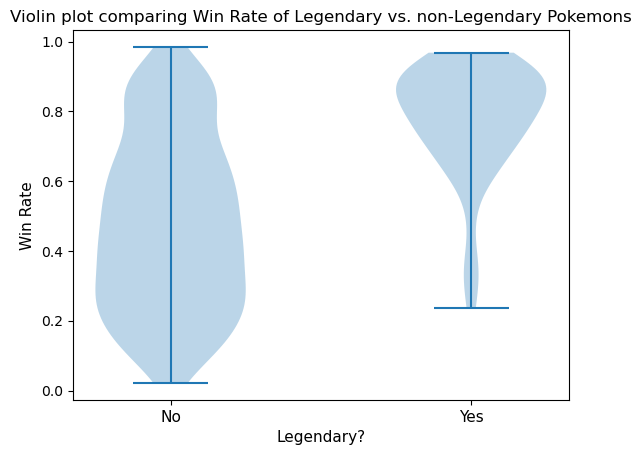

In [19]:
dataset = [pkmnWR[pkmnWR['Legendary']==False]['Win Rate'].values,
           pkmnWR[pkmnWR['Legendary']==True]['Win Rate'].values]
plt.violinplot(dataset = dataset)
plt.xticks([1,2],['No','Yes'],fontsize=11)
plt.ylabel('Win Rate',fontsize=11)
plt.xlabel('Legendary?',fontsize=11)
# txt="Violin plot comparing Win Rate of Legendary vs. non-Legendary Pokemons."
# plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.title('Violin plot comparing Win Rate of Legendary vs. non-Legendary Pokemons',fontsize=12)
plt.savefig(r"C:\Users\User\Desktop\DSI\DATA1030-Fall2022\Taemin Huh DATA1030 Project\figures\Legendary Violin Plot.png")
plt.show()

## Preprocessing

In [20]:
from sklearn.model_selection import train_test_split 
y = pkmnWR['Win Rate']
X = pkmnWR.loc[:, pkmnWR.columns != 'Win Rate']

print(X.head())
print(X.shape)
print(y)

   ID           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0   1      Bulbasaur  Grass  Poison  45      49       49       65       65   
1   2        Ivysaur  Grass  Poison  60      62       63       80       80   
2   3       Venusaur  Grass  Poison  80      82       83      100      100   
3   4  Mega Venusaur  Grass  Poison  80     100      123      122      120   
4   5     Charmander   Fire     NaN  39      52       43       60       50   

   Speed  Generation  Legendary  Total Win Count  Total Battle Count  
0     45           1      False               37                 133  
1     60           1      False               46                 121  
2     80           1      False               89                 132  
3     80           1      False               70                 125  
4     65           1      False               55                 112  
(783, 14)
0      0.278195
1      0.380165
2      0.674242
3      0.560000
4      0.491071
         ...   

In [21]:
def basic_split(X,y,train_size,val_size,test_size,random_state):
     
    X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = train_size,random_state=random_state)
    print('training set:',X_train.shape, y_train.shape) 
    print(X_other.shape, y_other.shape)
    
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = val_size/(val_size+test_size),random_state=random_state)
    print('validation set:',X_val.shape, y_val.shape)
    print('test set:',X_test.shape, y_test.shape)

    print(X_train.head())
    return X_train, y_train, X_val, y_val, X_test, y_test

print(basic_split(X,y,0.6,0.2,0.2,7))

training set: (469, 14) (469,)
(314, 14) (314,)
validation set: (157, 14) (157,)
test set: (157, 14) (157,)
      ID              Name  Type 1  Type 2   HP  Attack  Defense  Sp. Atk  \
95    96            Grimer  Poison     NaN   80      80       50       40   
221  222         Dunsparce  Normal     NaN  100      70       70       65   
139  140          Magikarp   Water     NaN   20      10       55       15   
541  542            Palkia   Water  Dragon   90     120      100      150   
7      8  Mega Charizard X    Fire  Dragon   78     130      111      130   

     Sp. Def  Speed  Generation  Legendary  Total Win Count  \
95        50     25           1      False               25   
221       65     45           2      False               26   
139       20     80           1      False               25   
541      120    100           4       True              115   
7         85    100           1      False              119   

     Total Battle Count  
95                  142 

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

X_train, y_train, X_val, y_val, X_test, y_test = basic_split(X,y,0.6,0.2,0.2,7)

# Pre-processing with OneHotEncoder and MinMaxScaler

onehot_ftrs = ['Type 1', 'Type 2', 'Generation', 'Legendary']
minmax_ftrs = ['HP','Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print('X_train shape:',X_train.shape)
print('X_train_prep shape:',X_train_prep.shape)
print(X_train_prep)

training set: (469, 14) (469,)
(314, 14) (314,)
validation set: (157, 14) (157,)
test set: (157, 14) (157,)
      ID              Name  Type 1  Type 2   HP  Attack  Defense  Sp. Atk  \
95    96            Grimer  Poison     NaN   80      80       50       40   
221  222         Dunsparce  Normal     NaN  100      70       70       65   
139  140          Magikarp   Water     NaN   20      10       55       15   
541  542            Palkia   Water  Dragon   90     120      100      150   
7      8  Mega Charizard X    Fire  Dragon   78     130      111      130   

     Sp. Def  Speed  Generation  Legendary  Total Win Count  \
95        50     25           1      False               25   
221       65     45           2      False               26   
139       20     80           1      False               25   
541      120    100           4       True              115   
7         85    100           1      False              119   

     Total Battle Count  
95                  142 

C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
# Extract the original feature names
minmax_ftrs = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Get the categories from the OneHotEncoder for each categorical feature
onehot_encoder = clf.named_steps['preprocessor'].transformers_[0][1]
onehot_ftrs = onehot_encoder.get_feature_names_out(['Type 1', 'Type 2', 'Generation', 'Legendary'])

# Combine the one-hot encoded feature names with the scaled feature names
all_feature_names = np.concatenate([onehot_ftrs, minmax_ftrs])

# Convert preprocessed arrays (X_train_prep and X_test_prep) to DataFrames with feature names
if isinstance(X_train_prep, np.ndarray):
    X_train_prep = pd.DataFrame(X_train_prep, columns=all_feature_names)
if isinstance(X_test_prep, np.ndarray):
    X_test_prep = pd.DataFrame(X_test_prep, columns=all_feature_names)

# Print feature names and their corresponding indices for reference
print("Feature names and their corresponding indices:")
for i, feature in enumerate(all_feature_names):
    print(f"{i}: {feature}")

Feature names and their corresponding indices:
0: Type 1_Bug
1: Type 1_Dark
2: Type 1_Dragon
3: Type 1_Electric
4: Type 1_Fairy
5: Type 1_Fighting
6: Type 1_Fire
7: Type 1_Flying
8: Type 1_Ghost
9: Type 1_Grass
10: Type 1_Ground
11: Type 1_Ice
12: Type 1_Normal
13: Type 1_Poison
14: Type 1_Psychic
15: Type 1_Rock
16: Type 1_Steel
17: Type 1_Water
18: Type 2_Bug
19: Type 2_Dark
20: Type 2_Dragon
21: Type 2_Electric
22: Type 2_Fairy
23: Type 2_Fighting
24: Type 2_Fire
25: Type 2_Flying
26: Type 2_Ghost
27: Type 2_Grass
28: Type 2_Ground
29: Type 2_Ice
30: Type 2_Normal
31: Type 2_Poison
32: Type 2_Psychic
33: Type 2_Rock
34: Type 2_Steel
35: Type 2_Water
36: Type 2_nan
37: Generation_1
38: Generation_2
39: Generation_3
40: Generation_4
41: Generation_5
42: Generation_6
43: Legendary_False
44: Legendary_True
45: HP
46: Attack
47: Defense
48: Sp. Atk
49: Sp. Def
50: Speed


## Regression Models

### Baseline

In [24]:
def baseline_model(X_train, X_test, y_train, y_test):
    from sklearn.metrics import mean_absolute_error, r2_score
    
    # Calc baseline preds (i.e. mean of y_train)
    baseline_pred = np.mean(y_train)
    print(f"Baseline prediction (mean of y_train): {baseline_pred}")
    
    # Test set preds
    y_test_pred = np.full(len(y_test), baseline_pred)
    
    # MAE & R2
    mae_baseline = mean_absolute_error(y_test, y_test_pred)
    r2_baseline = r2_score(y_test, y_test_pred)
    
    print(f"R^2 Score: {r2_baseline}")
    return mae_baseline, r2_baseline

baseline_mae, baseline_r2 = baseline_model(X_train_prep, X_test_prep, y_train, y_test)
print(f"MAE: {baseline_mae}")

Baseline prediction (mean of y_train): 0.4994157900730197
R^2 Score: -0.001114365822402652
MAE: 0.2173976676130286


### Multiple Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

def ml_linearreg(X_train_prep, X_test_prep, y_train, y_test):
    regressor = LinearRegression()
    regressor.fit(X_train_prep, y_train)

    print(f"R^2 Score: {regressor.score(X_train_prep, y_train)}")
    
    y_test_pred = regressor.predict(X_test_prep)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    return test_mae

test_mae = ml_linearreg(X_train_prep, X_test_prep, y_train, y_test)
print(f"MAE: {test_mae}")

R^2 Score: 0.9200301671350628
MAE: 0.048165277306910476


### SVM

In [26]:
from sklearn.svm import SVR

def ml_svm(X_train_prep, X_test_prep, y_train, y_test):
    regressor = SVR(kernel='linear')
    regressor.fit(X_train_prep, y_train)
    
    print(f"R^2 Score: {regressor.score(X_train_prep, y_train)}")

    y_test_pred = regressor.predict(X_test_prep)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    return test_mae

test_mae = ml_svm(X_train_prep, X_test_prep, y_train, y_test)
print(f"MAE: {test_mae}")

R^2 Score: 0.9144056913188496
MAE: 0.051980624220559254


### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor

def ml_decisiontree(X_train_prep, X_test_prep, y_train, y_test):
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train_prep, y_train)
    
    print(f"R^2 Score: {regressor.score(X_train_prep, y_train)}")
    
    y_test_pred = regressor.predict(X_test_prep)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    return test_mae

test_mae = ml_decisiontree(X_train_prep, X_test_prep, y_train, y_test)
print(f"MAE: {test_mae}")

R^2 Score: 0.999942935072033
MAE: 0.059326088069639626


### Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

def ml_randomforest(X_train_prep, X_test_prep, y_train, y_test):
    regressor = RandomForestRegressor(n_estimators=10, random_state=0)
    regressor.fit(X_train_prep, y_train)
    
    print(f"R^2 Score: {regressor.score(X_train_prep, y_train)}")
    
    y_test_pred = regressor.predict(X_test_prep)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    return test_mae

test_mae = ml_randomforest(X_train_prep, X_test_prep, y_train, y_test)
print(f"MAE: {test_mae}")

R^2 Score: 0.991011000110546
MAE: 0.0425590315496324


### XGBoost

In [29]:
import xgboost as xgb

def ml_xgboost(X_train_prep, X_test_prep, y_train, y_test):
    model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
    model.fit(X_train_prep, y_train)
    
    print(f"R^2 Score: {model.score(X_train_prep, y_train)}")
    
    y_test_pred = model.predict(X_test_prep)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    return test_mae

test_mae = ml_xgboost(X_train_prep, X_test_prep, y_train, y_test)
print(f" MAE: {test_mae}")

R^2 Score: 0.998448243877757
 MAE: 0.04146815120255998


### Initial Results

In [30]:
all_stats = [
    ml_linearreg(X_train_prep, X_test_prep, y_train, y_test),
    ml_svm(X_train_prep, X_test_prep, y_train, y_test),
    ml_decisiontree(X_train_prep, X_test_prep, y_train, y_test),
    ml_randomforest(X_train_prep, X_test_prep, y_train, y_test),
    ml_xgboost(X_train_prep, X_test_prep, y_train, y_test)
]

print(all_stats)

R^2 Score: 0.9200301671350628
R^2 Score: 0.9144056913188496
R^2 Score: 0.999942935072033
R^2 Score: 0.991011000110546
R^2 Score: 0.998448243877757
[0.048165277306910476, 0.051980624220559254, 0.059326088069639626, 0.0425590315496324, 0.04146815120255998]


In [31]:
ml_results = pd.DataFrame({'MAE': all_stats})
ml_results.rename(index = {0:'Linear',1:'SVM', 2:'Decision Tree', 3:'Random Forest', 4:'XGBoost'})

,MAE
Linear,0.048165
SVM,0.051981
Decision Tree,0.059326
Random Forest,0.042559
XGBoost,0.041468


## Cross Validation

In [32]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score

# Tune hyperparameters w/ GridSearchCV & eval
def tune_and_evaluate(model, param_grid, X_train, y_train, X_val, y_val, X_test, y_test):
    # GridSearchCV to tune train set hyperparameters
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train, y_train)
    
    # Best model after tuning
    best_model = grid_search.best_estimator_
    
    # Evaluate on val & test
    val_mae = mean_absolute_error(y_val, best_model.predict(X_val))
    test_mae = mean_absolute_error(y_test, best_model.predict(X_test))
    
    print(f"Best params for {type(model).__name__}: {grid_search.best_params_}")
    print(f"Validation MAE: {val_mae}, Test MAE: {test_mae}")
    
    return best_model, test_mae

# Uncertainties calc w/ repeated CV
def measure_splitting_uncertainty(best_model, X_train, y_train, n_splits=5, n_repeats=10):
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)
    cv_results = cross_val_score(best_model, X_train, y_train, cv=rkf, scoring='neg_mean_absolute_error')
    std_cv_mae = np.std(cv_results)
    print(f"Std CV MAE (Splitting Uncertainty): {std_cv_mae}")
    return std_cv_mae

# Non-deterministic uncertainties (RandomForest & XGBoost)
def measure_non_deterministic_uncertainty(model_class, param_grid, X_train, y_train, n_runs=10):
    maes = []
    for seed in range(n_runs):
        model = model_class(random_state=seed)
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        maes.append(-np.mean(cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')))
    std_mae = np.std(maes)
    print(f"Std MAE (Non-Deterministic Uncertainty): {std_mae}")
    return std_mae

def apply_model_tuning(X_train, y_train, X_val, y_val, X_test, y_test, baseline_mae):

    # Models & hyperparams
    models = {
        'LinearRegression': LinearRegression(),
        'SVM': SVR(),
        'DecisionTree': DecisionTreeRegressor(random_state=0),
        'RandomForest': RandomForestRegressor,
        'XGBoost': xgb.XGBRegressor
    }

    param_grids = {
        'LinearRegression': {'fit_intercept': [True, False]},
        'SVM': {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
        'DecisionTree': {'max_depth': [5, 10, 20], 'min_samples_split': [2, 10]},
        'RandomForest': {'n_estimators': [50, 100], 'max_depth': [5, 10]},
        'XGBoost': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],'colsample_bytree': [0.8, 0.9], 'subsample': [0.8, 0.9]}
    }

    results_summary = []
    best_models = {}

    for name, model in models.items():
        print(f"\nTuning and evaluating {name}...")

        # Instantiate RandomForest & XGBoost w/ random_state
        model_instance = model(random_state=0) if name in ['RandomForest', 'XGBoost'] else model

        best_model, test_mae = tune_and_evaluate(model_instance, param_grids[name], X_train, y_train, X_val, y_val, X_test, y_test)
        best_models[name] = best_model

        splitting_uncertainty = measure_splitting_uncertainty(best_model, X_train, y_train)

        non_deterministic_uncertainty = None
        if name in ['RandomForest', 'XGBoost']:
            non_deterministic_uncertainty = measure_non_deterministic_uncertainty(model, param_grids[name], X_train, y_train)

        # Std Dev from Baseline
        std_dev_from_baseline = (baseline_mae - test_mae) / splitting_uncertainty

        results_summary.append({
            'Model': name,
            'Test MAE': test_mae,
            'Std Dev from Baseline': std_dev_from_baseline,
            'Splitting Uncertainty': splitting_uncertainty,
            'Non-Deterministic Uncertainty': non_deterministic_uncertainty
        })


    summary_df = pd.DataFrame(results_summary)
    return summary_df, best_models

summary_df, best_models = apply_model_tuning(X_train_prep, y_train, X_val_prep, y_val, X_test_prep, y_test, baseline_mae)
summary_df


Tuning and evaluating LinearRegression...
Best params for LinearRegression: {'fit_intercept': False}
Validation MAE: 0.064849969141096, Test MAE: 0.04813656354809261


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Std CV MAE (Splitting Uncertainty): 0.00412778801355385

Tuning and evaluating SVM...


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


Best params for SVR: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Validation MAE: 0.06946183820534656, Test MAE: 0.052229752480089736
Std CV MAE (Splitting Uncertainty): 0.004867923374295833

Tuning and evaluating DecisionTree...


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Best params for DecisionTreeRegressor: {'max_depth': 5, 'min_samples_split': 10}
Validation MAE: 0.04121563195203525, Test MAE: 0.046020442366547246
Std CV MAE (Splitting Uncertainty): 0.004306264569827759

Tuning and evaluating RandomForest...


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Best params for RandomForestRegressor: {'max_depth': 10, 'n_estimators': 100}
Validation MAE: 0.040718376129579535, Test MAE: 0.040604577569123786
Std CV MAE (Splitting Uncertainty): 0.004094609545778325
Std MAE (Non-Deterministic Uncertainty): 0.0002527500400924317

Tuning and evaluating XGBoost...
Best params for XGBRegressor: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Validation MAE: 0.03937474879362297, Test MAE: 0.03875810405226512
Std CV MAE (Splitting Uncertainty): 0.003978734671130673
Std MAE (Non-Deterministic Uncertainty): 0.00027846217749713786


,Model,Test MAE,Std Dev from Baseline,Splitting Uncertainty,Non-Deterministic Uncertainty
0,LinearRegression,0.048137,41.005280,0.004128,NaN
1,SVM,0.052230,33.929851,0.004868,NaN
2,DecisionTree,0.046020,39.797189,0.004306,NaN
3,RandomForest,0.040605,43.177033,0.004095,0.000253
4,XGBoost,0.038758,44.898587,0.003979,0.000278


Selected typical instance index: 11
Selected edge instance index: 119

Calculating feature importance and SHAP values for LinearRegression...

LinearRegression Global Feature Importance:
       Feature    Importance
50  Feature 50  2.184277e-01
46  Feature 46  2.034551e-02
43  Feature 43  7.043117e-03
44  Feature 44  5.456669e-03
37  Feature 37  2.428915e-03
39  Feature 39  1.792091e-03
28  Feature 28  1.777554e-03
14  Feature 14  1.608585e-03
10  Feature 10  1.587648e-03
49  Feature 49  1.407365e-03
5    Feature 5  1.357822e-03
41  Feature 41  1.204644e-03
45  Feature 45  1.037330e-03
42  Feature 42  8.707081e-04
2    Feature 2  8.593065e-04
13  Feature 13  7.624159e-04
36  Feature 36  6.026994e-04
0    Feature 0  5.128833e-04
34  Feature 34  4.125197e-04
24  Feature 24  3.560072e-04
47  Feature 47  3.188911e-04
40  Feature 40  2.734770e-04
4    Feature 4  2.654514e-04
23  Feature 23  2.578527e-04
30  Feature 30  2.554803e-04
6    Feature 6  2.468468e-04
31  Feature 31  1.965165e-04
2

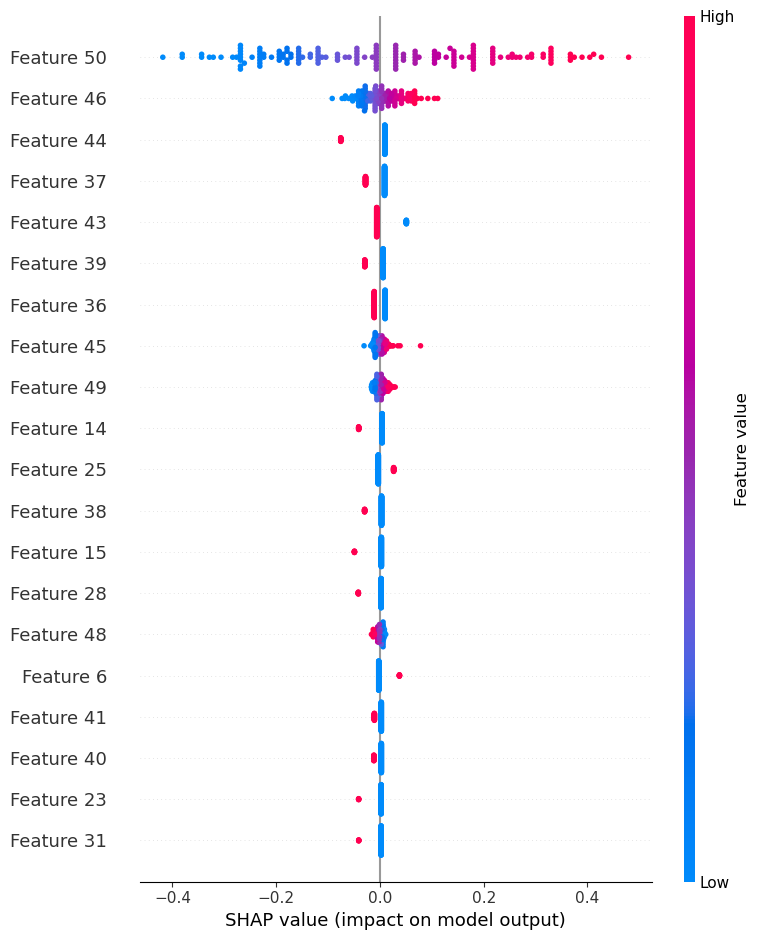


LinearRegression SHAP values for the typical instance (index 11):
       Feature SHAP Value
0    Feature 0      0.002
1    Feature 1     -0.000
2    Feature 2     -0.023
3    Feature 3      0.000
4    Feature 4      0.001
5    Feature 5      0.001
6    Feature 6     -0.002
7    Feature 7     -0.000
8    Feature 8     -0.000
9    Feature 9     -0.000
10  Feature 10     -0.000
11  Feature 11      0.001
12  Feature 12     -0.001
13  Feature 13      0.002
14  Feature 14      0.004
15  Feature 15      0.003
16  Feature 16      0.000
17  Feature 17      0.001
18  Feature 18      0.000
19  Feature 19      0.001
20  Feature 20      0.001
21  Feature 21     -0.000
22  Feature 22     -0.000
23  Feature 23      0.002
24  Feature 24     -0.000
25  Feature 25     -0.003
26  Feature 26      0.000
27  Feature 27     -0.000
28  Feature 28      0.002
29  Feature 29     -0.000
30  Feature 30      0.000
31  Feature 31      0.002
32  Feature 32     -0.001
33  Feature 33      0.001
34  Feature 34     -0.0

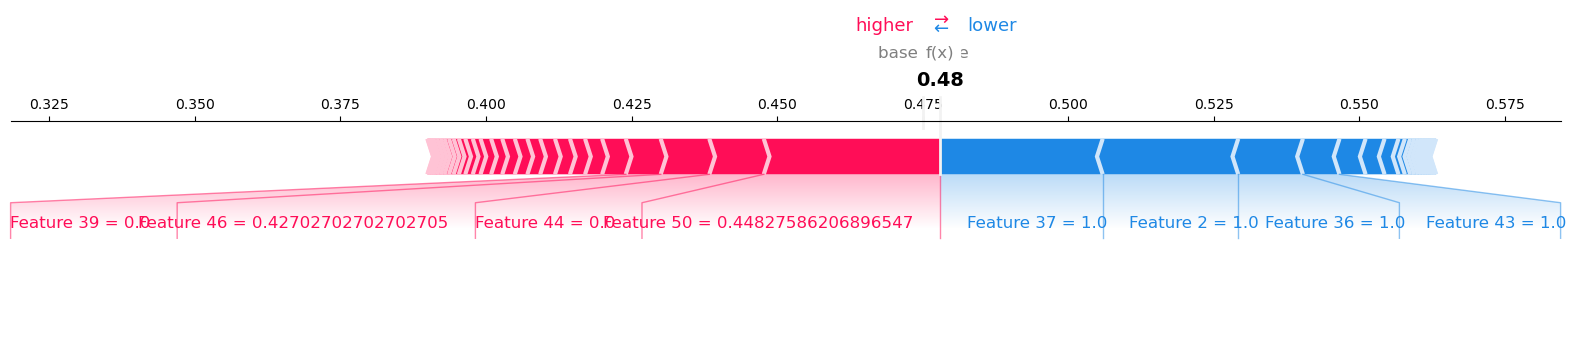


LinearRegression SHAP values for the edge instance (index 119):
       Feature SHAP Value
0    Feature 0      0.002
1    Feature 1     -0.000
2    Feature 2      0.002
3    Feature 3      0.000
4    Feature 4      0.001
5    Feature 5      0.001
6    Feature 6     -0.002
7    Feature 7     -0.000
8    Feature 8     -0.000
9    Feature 9     -0.000
10  Feature 10     -0.000
11  Feature 11      0.001
12  Feature 12      0.004
13  Feature 13      0.002
14  Feature 14      0.004
15  Feature 15      0.003
16  Feature 16      0.000
17  Feature 17      0.001
18  Feature 18      0.000
19  Feature 19      0.001
20  Feature 20      0.001
21  Feature 21     -0.000
22  Feature 22     -0.000
23  Feature 23      0.002
24  Feature 24     -0.000
25  Feature 25      0.026
26  Feature 26      0.000
27  Feature 27     -0.000
28  Feature 28      0.002
29  Feature 29     -0.000
30  Feature 30      0.000
31  Feature 31      0.002
32  Feature 32     -0.001
33  Feature 33      0.001
34  Feature 34     -0.001

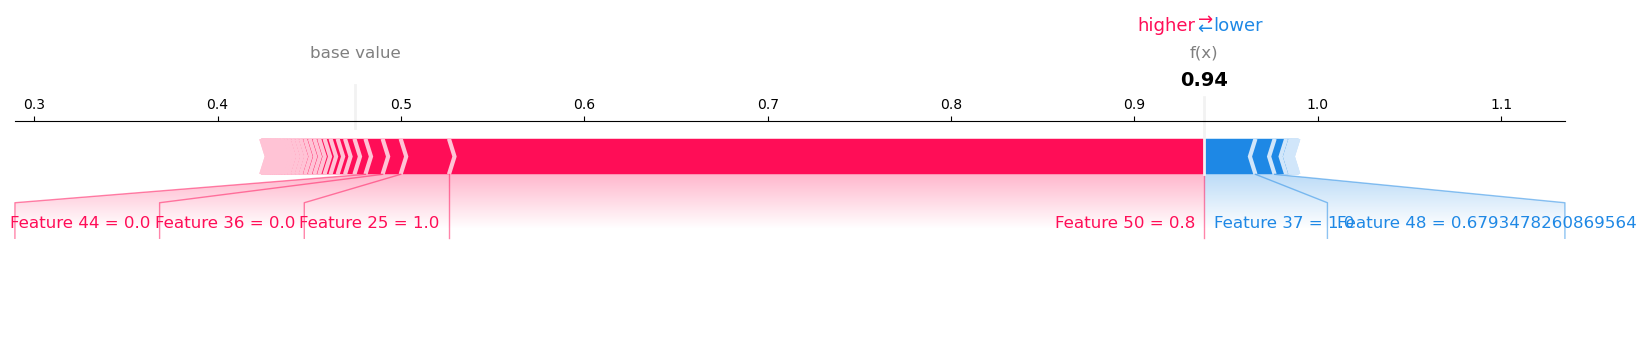


Calculating feature importance and SHAP values for SVM...

SVM Global Feature Importance:
       Feature    Importance
50  Feature 50  2.088433e-01
46  Feature 46  2.335917e-02
10  Feature 10  2.566417e-03
49  Feature 49  1.334798e-03
28  Feature 28  1.143525e-03
32  Feature 32  6.006733e-04
34  Feature 34  5.984055e-04
5    Feature 5  4.722404e-04
14  Feature 14  4.621027e-04
25  Feature 25  3.983503e-04
40  Feature 40  3.565923e-04
12  Feature 12  3.493383e-04
36  Feature 36  3.045373e-04
45  Feature 45  3.032227e-04
0    Feature 0  2.887350e-04
2    Feature 2  1.834859e-04
35  Feature 35  1.664945e-04
8    Feature 8  1.183832e-04
13  Feature 13  9.573578e-05
27  Feature 27  9.215357e-05
31  Feature 31  8.859351e-05
39  Feature 39  5.513931e-05
26  Feature 26  5.025961e-05
19  Feature 19  1.424075e-05
16  Feature 16  7.159569e-07
23  Feature 23  8.812395e-17
29  Feature 29  0.000000e+00
4    Feature 4  0.000000e+00
30  Feature 30  0.000000e+00
7    Feature 7  0.000000e+00
24  Featur

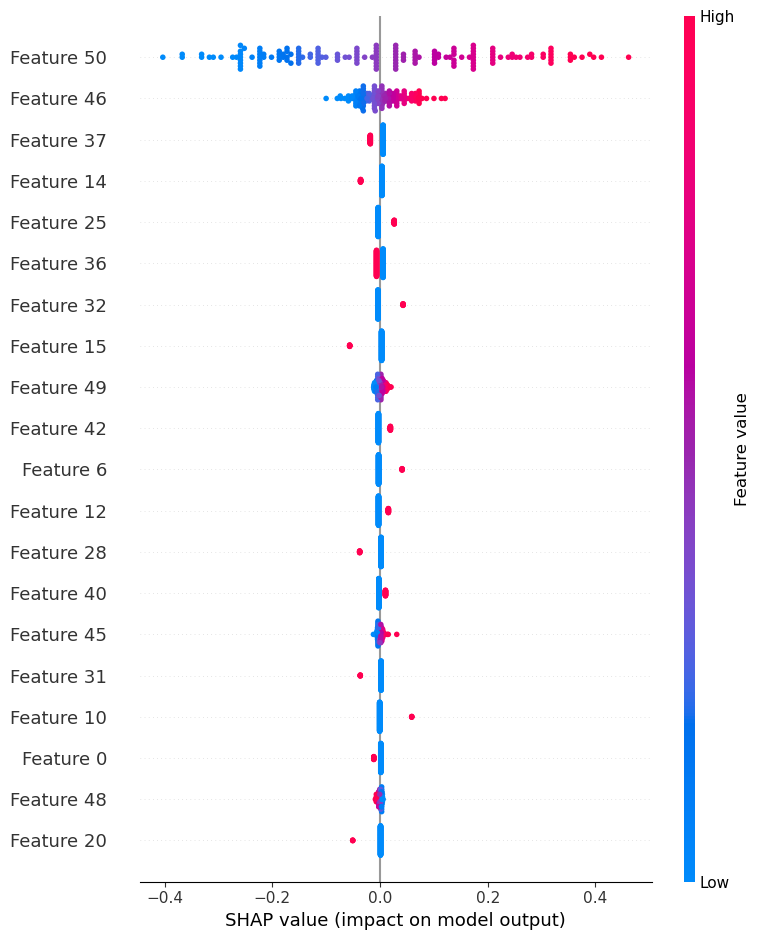


SVM SHAP values for the typical instance (index 11):
       Feature SHAP Value
0    Feature 0      0.001
1    Feature 1     -0.000
2    Feature 2     -0.004
3    Feature 3      0.000
4    Feature 4     -0.000
5    Feature 5      0.001
6    Feature 6     -0.003
7    Feature 7     -0.000
8    Feature 8     -0.000
9    Feature 9     -0.000
10  Feature 10     -0.001
11  Feature 11      0.001
12  Feature 12     -0.003
13  Feature 13      0.000
14  Feature 14      0.004
15  Feature 15      0.003
16  Feature 16     -0.000
17  Feature 17      0.000
18  Feature 18      0.000
19  Feature 19      0.001
20  Feature 20      0.001
21  Feature 21     -0.000
22  Feature 22     -0.001
23  Feature 23     -0.000
24  Feature 24     -0.000
25  Feature 25     -0.003
26  Feature 26      0.000
27  Feature 27      0.000
28  Feature 28      0.002
29  Feature 29      0.000
30  Feature 30     -0.000
31  Feature 31      0.002
32  Feature 32     -0.004
33  Feature 33      0.001
34  Feature 34     -0.001
35  Featur

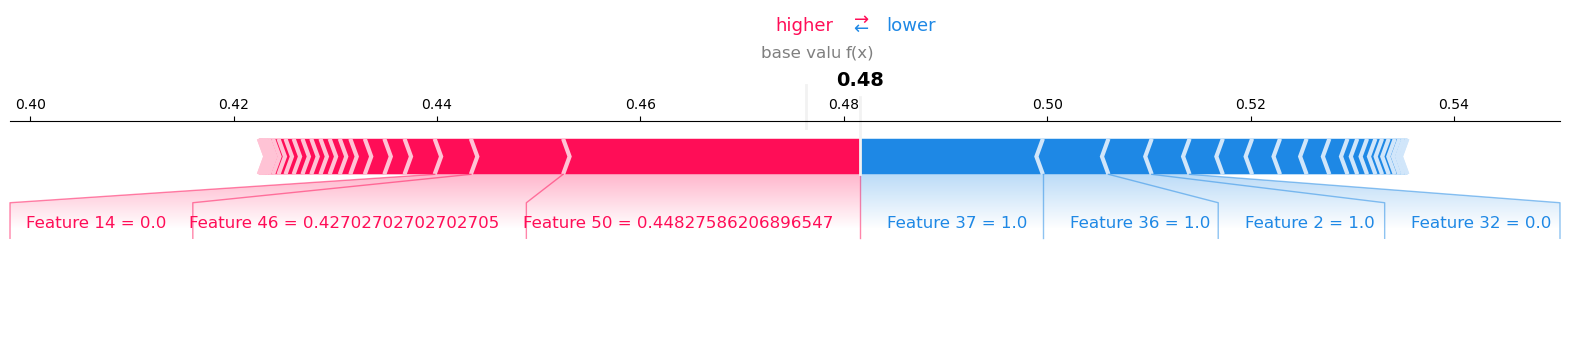


SVM SHAP values for the edge instance (index 119):
       Feature SHAP Value
0    Feature 0      0.001
1    Feature 1     -0.000
2    Feature 2      0.000
3    Feature 3      0.000
4    Feature 4     -0.000
5    Feature 5      0.001
6    Feature 6     -0.003
7    Feature 7     -0.000
8    Feature 8     -0.000
9    Feature 9     -0.000
10  Feature 10     -0.001
11  Feature 11      0.001
12  Feature 12      0.016
13  Feature 13      0.000
14  Feature 14      0.004
15  Feature 15      0.003
16  Feature 16     -0.000
17  Feature 17      0.000
18  Feature 18      0.000
19  Feature 19      0.001
20  Feature 20      0.001
21  Feature 21     -0.000
22  Feature 22     -0.001
23  Feature 23     -0.000
24  Feature 24     -0.000
25  Feature 25      0.026
26  Feature 26      0.000
27  Feature 27      0.000
28  Feature 28      0.002
29  Feature 29      0.000
30  Feature 30     -0.000
31  Feature 31      0.002
32  Feature 32     -0.004
33  Feature 33      0.001
34  Feature 34     -0.001
35  Feature 

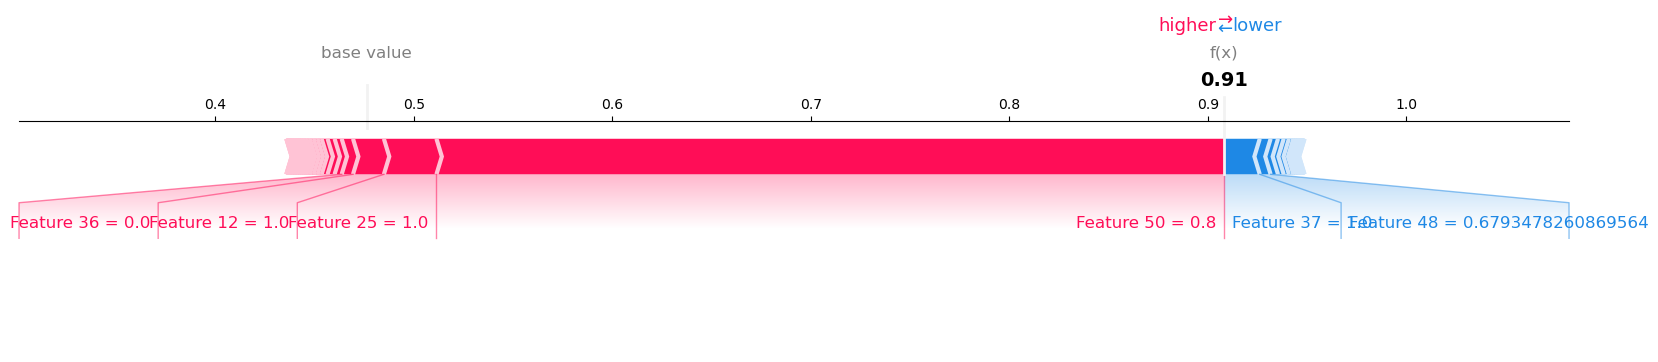


Calculating feature importance and SHAP values for DecisionTree...

DecisionTree Global Feature Importance:
       Feature  Importance
50  Feature 50    0.955395
46  Feature 46    0.042320
26  Feature 26    0.001248
0    Feature 0    0.000721
47  Feature 47    0.000317
4    Feature 4    0.000000
39  Feature 39    0.000000
30  Feature 30    0.000000
31  Feature 31    0.000000
32  Feature 32    0.000000
33  Feature 33    0.000000
34  Feature 34    0.000000
35  Feature 35    0.000000
36  Feature 36    0.000000
37  Feature 37    0.000000
38  Feature 38    0.000000
40  Feature 40    0.000000
28  Feature 28    0.000000
41  Feature 41    0.000000
42  Feature 42    0.000000
43  Feature 43    0.000000
44  Feature 44    0.000000
45  Feature 45    0.000000
2    Feature 2    0.000000
48  Feature 48    0.000000
49  Feature 49    0.000000
29  Feature 29    0.000000
27  Feature 27    0.000000
5    Feature 5    0.000000
15  Feature 15    0.000000
6    Feature 6    0.000000
7    Feature 7    0.000000


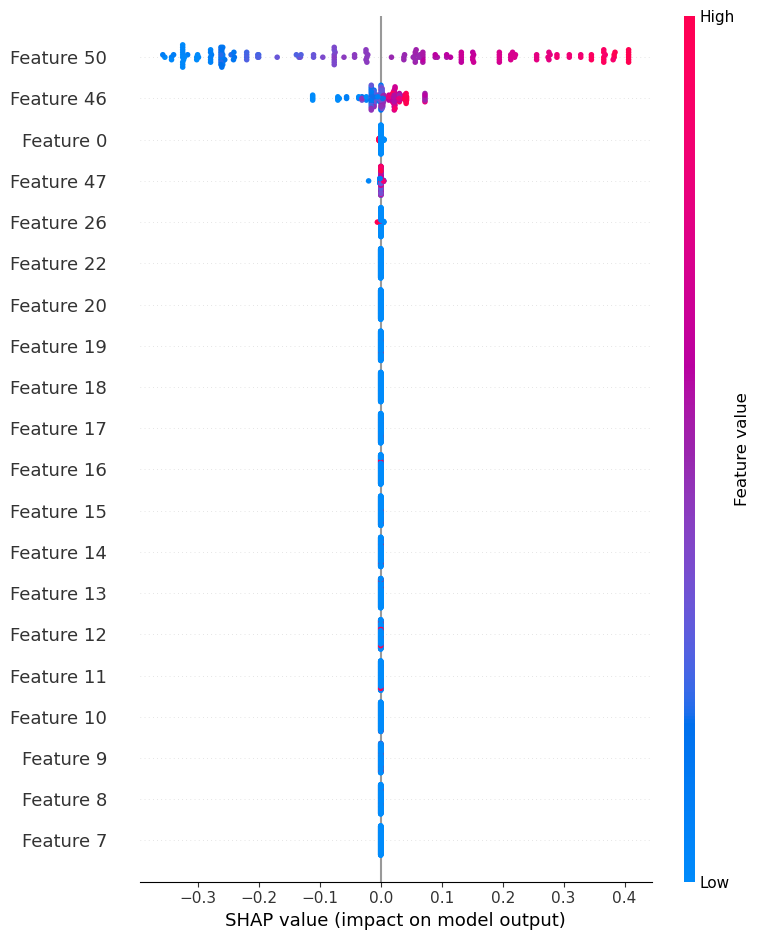


DecisionTree SHAP values for the typical instance (index 11):
       Feature SHAP Value
0    Feature 0      0.000
1    Feature 1      0.000
2    Feature 2      0.000
3    Feature 3      0.000
4    Feature 4      0.000
5    Feature 5      0.000
6    Feature 6      0.000
7    Feature 7      0.000
8    Feature 8      0.000
9    Feature 9      0.000
10  Feature 10      0.000
11  Feature 11      0.000
12  Feature 12      0.000
13  Feature 13      0.000
14  Feature 14      0.000
15  Feature 15      0.000
16  Feature 16      0.000
17  Feature 17      0.000
18  Feature 18      0.000
19  Feature 19      0.000
20  Feature 20      0.000
21  Feature 21      0.000
22  Feature 22      0.000
23  Feature 23      0.000
24  Feature 24      0.000
25  Feature 25      0.000
26  Feature 26      0.000
27  Feature 27      0.000
28  Feature 28      0.000
29  Feature 29      0.000
30  Feature 30      0.000
31  Feature 31      0.000
32  Feature 32      0.000
33  Feature 33      0.000
34  Feature 34      0.000
3

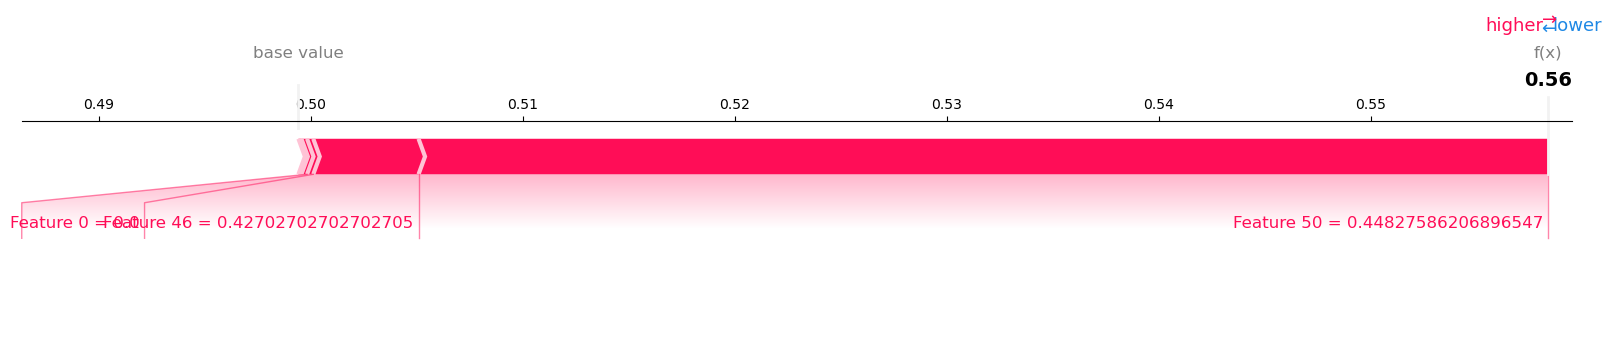


DecisionTree SHAP values for the edge instance (index 119):
       Feature SHAP Value
0    Feature 0      0.000
1    Feature 1      0.000
2    Feature 2      0.000
3    Feature 3      0.000
4    Feature 4      0.000
5    Feature 5      0.000
6    Feature 6      0.000
7    Feature 7      0.000
8    Feature 8      0.000
9    Feature 9      0.000
10  Feature 10      0.000
11  Feature 11      0.000
12  Feature 12      0.000
13  Feature 13      0.000
14  Feature 14      0.000
15  Feature 15      0.000
16  Feature 16      0.000
17  Feature 17      0.000
18  Feature 18      0.000
19  Feature 19      0.000
20  Feature 20      0.000
21  Feature 21      0.000
22  Feature 22      0.000
23  Feature 23      0.000
24  Feature 24      0.000
25  Feature 25      0.000
26  Feature 26      0.005
27  Feature 27      0.000
28  Feature 28      0.000
29  Feature 29      0.000
30  Feature 30      0.000
31  Feature 31      0.000
32  Feature 32      0.000
33  Feature 33      0.000
34  Feature 34      0.000
35 

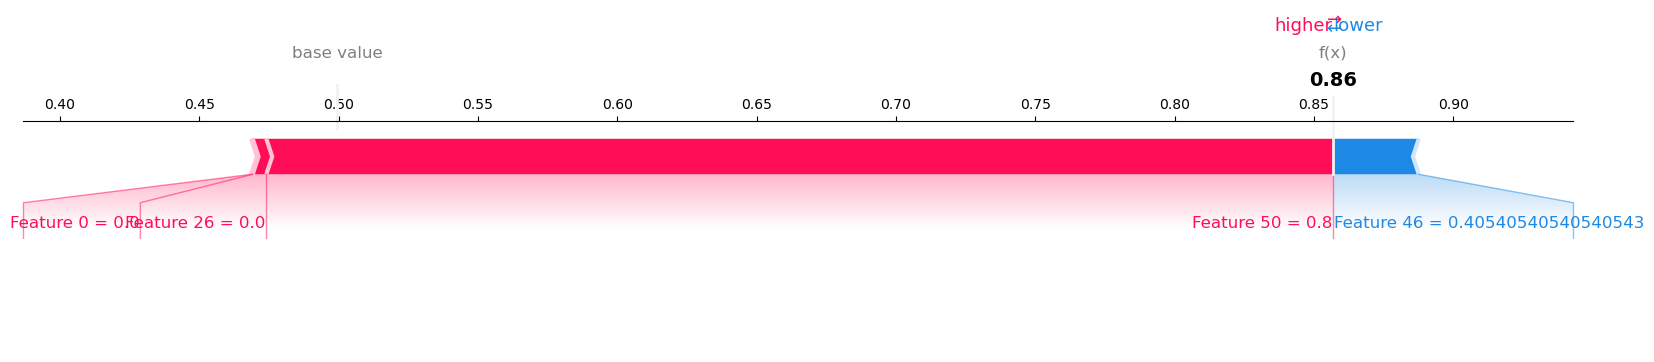


Calculating feature importance and SHAP values for RandomForest...

RandomForest Global Feature Importance:
       Feature  Importance
50  Feature 50    0.922071
46  Feature 46    0.037326
45  Feature 45    0.010574
48  Feature 48    0.008525
47  Feature 47    0.004498
49  Feature 49    0.003963
26  Feature 26    0.001368
0    Feature 0    0.000754
1    Feature 1    0.000654
34  Feature 34    0.000632
36  Feature 36    0.000567
5    Feature 5    0.000513
28  Feature 28    0.000501
37  Feature 37    0.000479
32  Feature 32    0.000474
11  Feature 11    0.000468
39  Feature 39    0.000455
40  Feature 40    0.000430
10  Feature 10    0.000423
17  Feature 17    0.000421
41  Feature 41    0.000418
12  Feature 12    0.000404
38  Feature 38    0.000369
16  Feature 16    0.000325
8    Feature 8    0.000302
42  Feature 42    0.000295
25  Feature 25    0.000278
9    Feature 9    0.000232
31  Feature 31    0.000219
19  Feature 19    0.000212
13  Feature 13    0.000196
3    Feature 3    0.000182


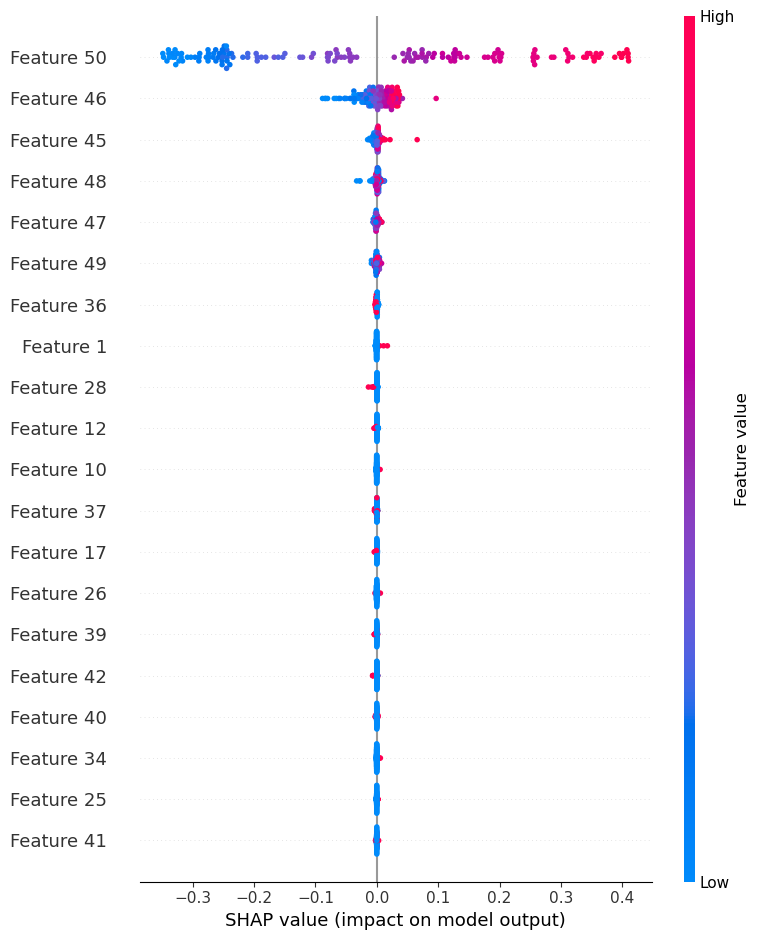


RandomForest SHAP values for the typical instance (index 11):
       Feature SHAP Value
0    Feature 0     -0.000
1    Feature 1     -0.002
2    Feature 2      0.000
3    Feature 3      0.000
4    Feature 4     -0.000
5    Feature 5      0.000
6    Feature 6     -0.000
7    Feature 7      0.000
8    Feature 8     -0.000
9    Feature 9     -0.000
10  Feature 10     -0.000
11  Feature 11      0.000
12  Feature 12      0.002
13  Feature 13      0.000
14  Feature 14      0.000
15  Feature 15     -0.000
16  Feature 16     -0.000
17  Feature 17      0.000
18  Feature 18      0.000
19  Feature 19      0.000
20  Feature 20     -0.000
21  Feature 21      0.000
22  Feature 22     -0.000
23  Feature 23     -0.000
24  Feature 24      0.000
25  Feature 25     -0.000
26  Feature 26     -0.000
27  Feature 27     -0.000
28  Feature 28      0.000
29  Feature 29      0.000
30  Feature 30     -0.000
31  Feature 31      0.000
32  Feature 32     -0.000
33  Feature 33     -0.000
34  Feature 34     -0.000
3

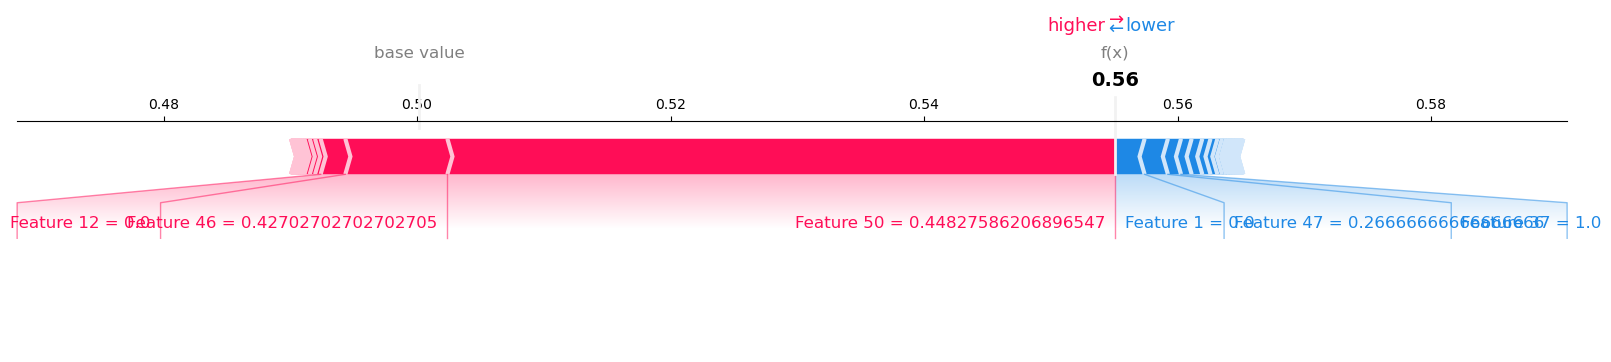


RandomForest SHAP values for the edge instance (index 119):
       Feature SHAP Value
0    Feature 0      0.000
1    Feature 1     -0.001
2    Feature 2     -0.000
3    Feature 3     -0.000
4    Feature 4      0.000
5    Feature 5      0.000
6    Feature 6     -0.000
7    Feature 7      0.000
8    Feature 8      0.000
9    Feature 9     -0.000
10  Feature 10     -0.000
11  Feature 11      0.001
12  Feature 12     -0.002
13  Feature 13      0.000
14  Feature 14      0.000
15  Feature 15     -0.000
16  Feature 16     -0.000
17  Feature 17      0.000
18  Feature 18      0.000
19  Feature 19      0.000
20  Feature 20      0.000
21  Feature 21      0.000
22  Feature 22     -0.000
23  Feature 23      0.000
24  Feature 24     -0.000
25  Feature 25      0.000
26  Feature 26      0.001
27  Feature 27     -0.000
28  Feature 28      0.000
29  Feature 29     -0.000
30  Feature 30     -0.000
31  Feature 31      0.000
32  Feature 32      0.000
33  Feature 33     -0.000
34  Feature 34     -0.000
35 

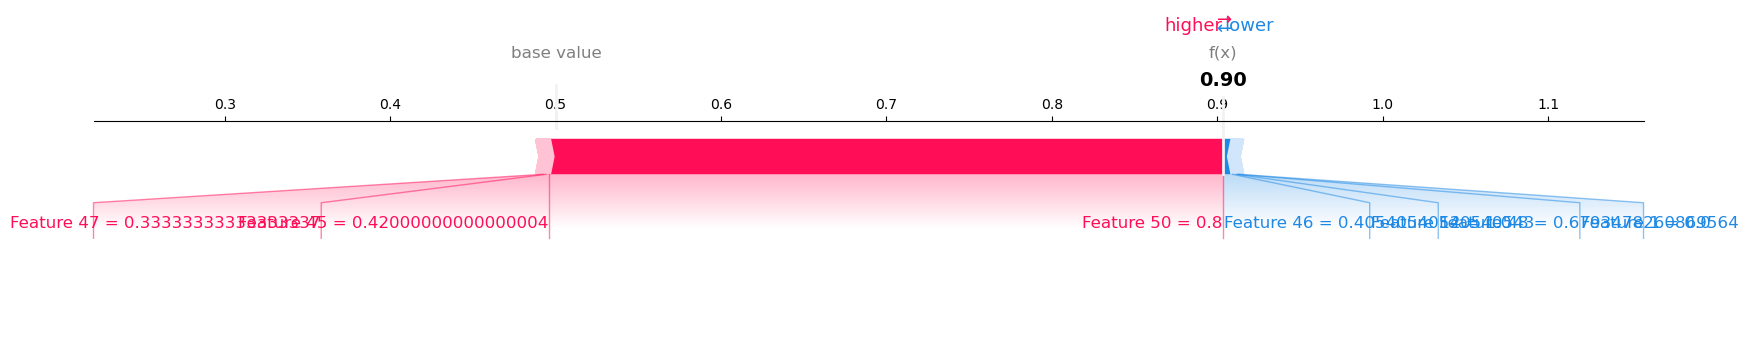


Calculating feature importance and SHAP values for XGBoost...

XGBoost Global Feature Importance:
       Feature  Importance
50  Feature 50    0.424124
43  Feature 43    0.111956
25  Feature 25    0.073364
48  Feature 48    0.057959
46  Feature 46    0.048542
15  Feature 15    0.048055
49  Feature 49    0.042773
45  Feature 45    0.029056
3    Feature 3    0.020552
42  Feature 42    0.016273
1    Feature 1    0.011360
26  Feature 26    0.011225
28  Feature 28    0.010914
11  Feature 11    0.010745
10  Feature 10    0.010216
8    Feature 8    0.006050
5    Feature 5    0.005319
47  Feature 47    0.005246
34  Feature 34    0.004736
36  Feature 36    0.004687
32  Feature 32    0.004554
35  Feature 35    0.004484
13  Feature 13    0.004053
9    Feature 9    0.003706
31  Feature 31    0.003180
21  Feature 21    0.002929
39  Feature 39    0.002562
17  Feature 17    0.002550
6    Feature 6    0.002488
38  Feature 38    0.002328
12  Feature 12    0.002167
0    Feature 0    0.001899
14  Featur

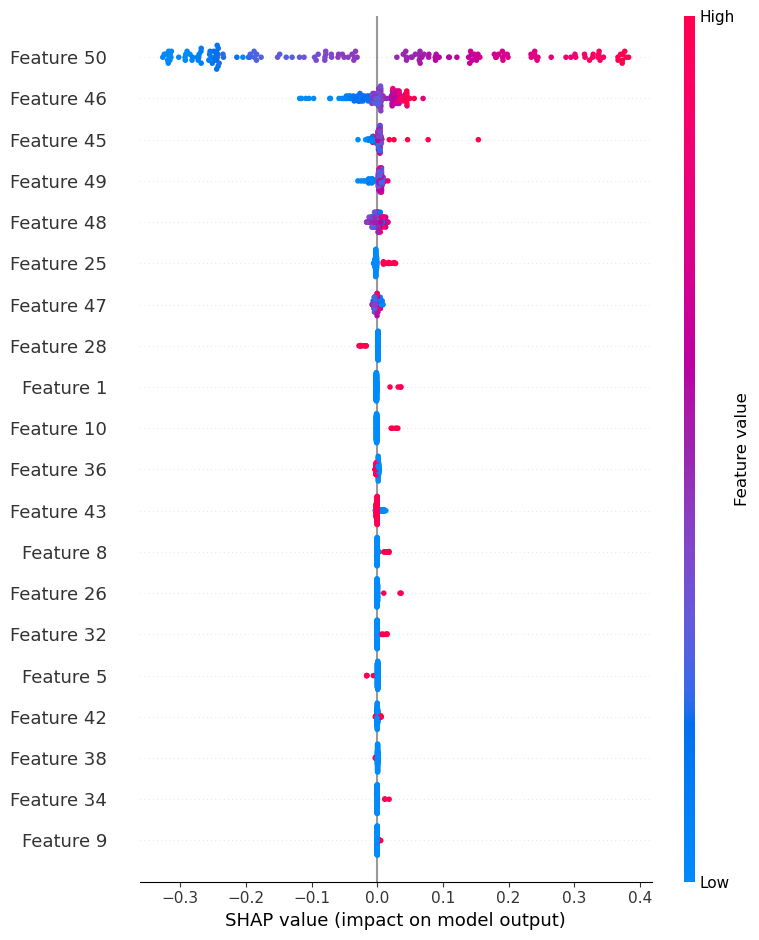


XGBoost SHAP values for the typical instance (index 11):
       Feature SHAP Value
0    Feature 0     -0.000
1    Feature 1     -0.002
2    Feature 2      0.000
3    Feature 3      0.000
4    Feature 4      0.000
5    Feature 5      0.000
6    Feature 6     -0.000
7    Feature 7      0.000
8    Feature 8     -0.000
9    Feature 9     -0.000
10  Feature 10     -0.001
11  Feature 11      0.000
12  Feature 12      0.000
13  Feature 13      0.000
14  Feature 14      0.000
15  Feature 15      0.000
16  Feature 16     -0.000
17  Feature 17     -0.000
18  Feature 18      0.000
19  Feature 19      0.000
20  Feature 20      0.000
21  Feature 21      0.000
22  Feature 22     -0.000
23  Feature 23      0.000
24  Feature 24      0.000
25  Feature 25     -0.002
26  Feature 26     -0.000
27  Feature 27      0.000
28  Feature 28      0.001
29  Feature 29      0.000
30  Feature 30      0.000
31  Feature 31      0.000
32  Feature 32     -0.000
33  Feature 33      0.000
34  Feature 34     -0.000
35  Fe

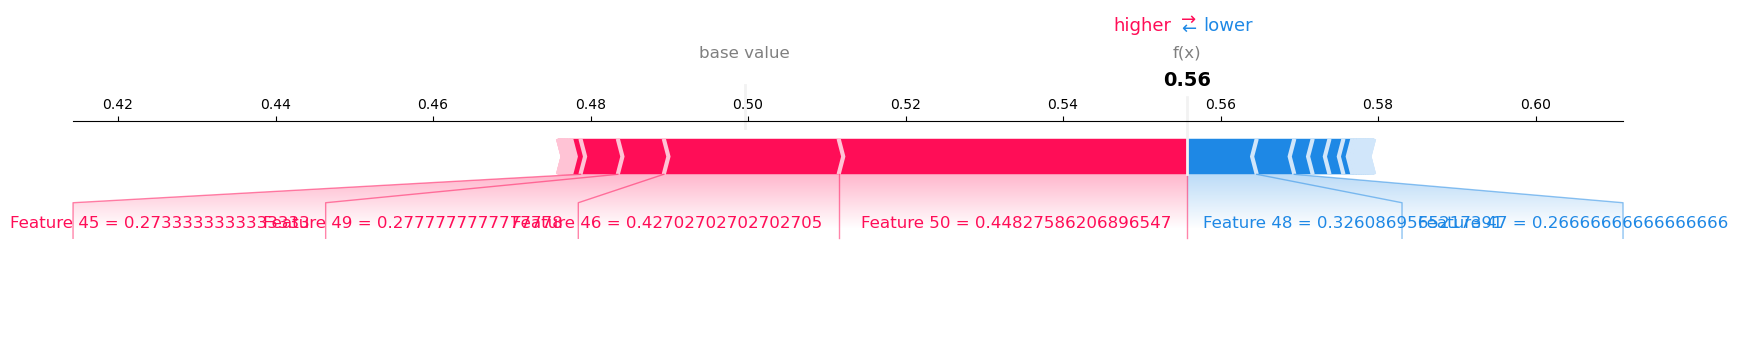


XGBoost SHAP values for the edge instance (index 119):
       Feature SHAP Value
0    Feature 0      0.000
1    Feature 1     -0.001
2    Feature 2     -0.000
3    Feature 3      0.000
4    Feature 4      0.000
5    Feature 5      0.001
6    Feature 6     -0.000
7    Feature 7      0.000
8    Feature 8     -0.000
9    Feature 9     -0.000
10  Feature 10     -0.001
11  Feature 11      0.001
12  Feature 12     -0.001
13  Feature 13      0.000
14  Feature 14      0.000
15  Feature 15      0.000
16  Feature 16     -0.000
17  Feature 17     -0.000
18  Feature 18      0.000
19  Feature 19      0.000
20  Feature 20      0.000
21  Feature 21      0.000
22  Feature 22     -0.000
23  Feature 23      0.000
24  Feature 24      0.000
25  Feature 25      0.011
26  Feature 26      0.000
27  Feature 27      0.000
28  Feature 28      0.001
29  Feature 29      0.000
30  Feature 30      0.000
31  Feature 31      0.000
32  Feature 32     -0.000
33  Feature 33      0.000
34  Feature 34     -0.000
35  Feat

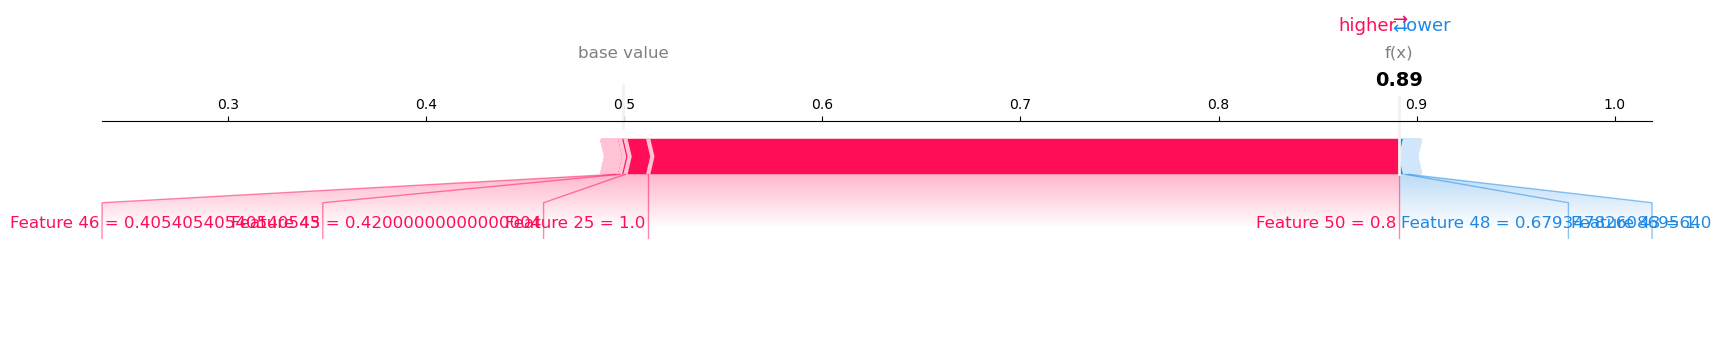

In [33]:
import shap
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Global feature importance for tree-based models (Decision Tree, Random Forest, XGBoost)
def calculate_tree_feature_importance(model, feature_names):
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    return feature_importance_df

# Global feature importance for Linear Regression & SVM (permutation importance)
def calculate_permutation_importance(model, X_data, y_data, feature_names):
    result = permutation_importance(model, X_data, y_data, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
    perm_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': result.importances_mean})
    perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)
    return perm_importance_df

# SHAP values for tree-based models
def calculate_shap_values_tree(model, X_data):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_data)
    return shap_values, explainer

# SHAP values for linear models
def calculate_shap_values_linear(model, X_data):
    explainer = shap.LinearExplainer(model, X_data)
    shap_values = explainer.shap_values(X_data)
    return shap_values, explainer

def calculate_importances_and_shap(models, X_test_prep, y_test, feature_names, instance_index_typical, instance_index_edge):
    for name, model in models.items():
        print(f"\nCalculating feature importance and SHAP values for {name}...")

        if name in ['LinearRegression', 'SVM']:
            feature_importance_df = calculate_permutation_importance(model, X_test_prep, y_test, feature_names)
        else:
            feature_importance_df = calculate_tree_feature_importance(model, feature_names)
        
        print(f"\n{name} Global Feature Importance:")
        print(feature_importance_df)

        if name in ['LinearRegression', 'SVM']:
            shap_values, explainer = calculate_shap_values_linear(model, X_test_prep)
        else:
            shap_values, explainer = calculate_shap_values_tree(model, X_test_prep)
        
        print(f"\n{name} SHAP Summary Plot:")
        shap.summary_plot(shap_values, X_test_prep, feature_names=feature_names)

        # SHAP values for the typical instance
        shap_values_typical_instance = shap_values[instance_index_typical]
        print(f"\n{name} SHAP values for the typical instance (index {instance_index_typical}):")
        shap_instance_df_typical = pd.DataFrame({
            'Feature': feature_names,
            'SHAP Value': [f"{val:.3f}" for val in shap_values_typical_instance]
        })
        print(shap_instance_df_typical)

        if isinstance(X_test_prep, pd.DataFrame):
            typical_instance_data = X_test_prep.iloc[instance_index_typical]
            edge_instance_data = X_test_prep.iloc[instance_index_edge]
        else:
            typical_instance_data = X_test_prep[instance_index_typical]
            edge_instance_data = X_test_prep[instance_index_edge]

        # Force plot for typical case
        print(f"\n{name} SHAP force plot for the typical instance (index {instance_index_typical}):")
        shap.force_plot(explainer.expected_value, shap_values_typical_instance, typical_instance_data, 
                        feature_names=feature_names, matplotlib=True, show=True)
        plt.show()

        # SHAP values for edge case
        shap_values_edge_instance = shap_values[instance_index_edge]
        print(f"\n{name} SHAP values for the edge instance (index {instance_index_edge}):")
        shap_instance_df_edge = pd.DataFrame({
            'Feature': feature_names,
            'SHAP Value': [f"{val:.3f}" for val in shap_values_edge_instance]
        })
        print(shap_instance_df_edge)

        # Force plot for edge case
        print(f"\n{name} SHAP force plot for the edge instance (index {instance_index_edge}):")
        shap.force_plot(explainer.expected_value, shap_values_edge_instance, edge_instance_data, 
                        feature_names=feature_names, matplotlib=True, show=True)
        plt.show()

feature_names = [f"Feature {i}" for i in range(X_train_prep.shape[1])]

# Dynmaic typical case selection
predictions = best_models['LinearRegression'].predict(X_test_prep)
median_pred_value = np.median(predictions)
instance_index_typical = np.argmin(np.abs(predictions - median_pred_value))

# Dynamic edge case selection
instance_index_edge = np.argmax(predictions)

print(f"Selected typical instance index: {instance_index_typical}")
print(f"Selected edge instance index: {instance_index_edge}")

calculate_importances_and_shap(best_models, X_test_prep, y_test, feature_names, instance_index_typical, instance_index_edge)

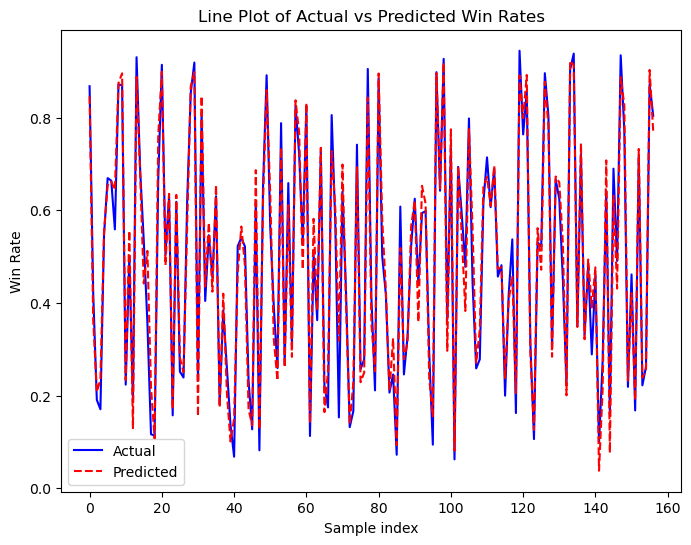

,Actual,Predicted
31,0.867769,0.845803
669,0.422222,0.363340
345,0.190909,0.207949
459,0.170543,0.234905
201,0.546218,0.554233


In [34]:
# XGBoost selected as best model (due to lowest MAE)
best_model = best_models['XGBoost']  

y_pred = best_model.predict(X_test_prep)
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test)), y_test, label='Actual', color='b')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='r', linestyle='dashed')
plt.title('Line Plot of Actual vs Predicted Win Rates')
plt.xlabel('Sample index')
plt.ylabel('Win Rate')
plt.legend()
plt.show()

comparison_df.head()

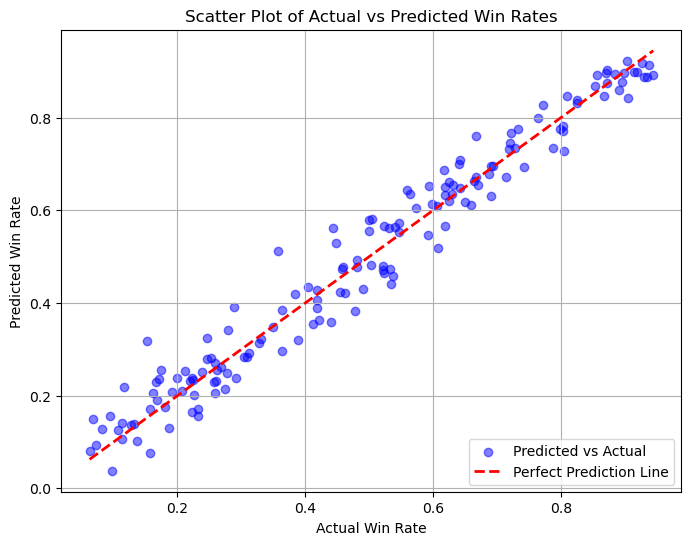

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Perfect Prediction Line')
plt.title('Scatter Plot of Actual vs Predicted Win Rates')
plt.xlabel('Actual Win Rate')
plt.ylabel('Predicted Win Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()